In [3]:
#filter depression and suicidewatch subreddit
import pandas as pd

# Load the datasets
df_2019 = pd.read_csv('./Labeled_SI_Data2019.csv')
print(df_2019.shape)
df_2020 = pd.read_csv('./Labeled_SI_Data2020.csv')
print(df_2020.shape)
df_2021 = pd.read_csv('./Labeled_SI_Data2021.csv')
print(df_2021.shape)
df_2022 = pd.read_csv('./Labeled_SI_Data2022.csv')
print(df_2022.shape)

(55419, 7)
(71400, 7)
(77997, 7)
(80525, 7)


In [37]:
# Combine the datasets
df = pd.concat([df_2019, df_2020, df_2021, df_2022])

df.shape

(285341, 7)

In [38]:
# Drop duplicate posts based on the 'selftext' column
df = df.drop_duplicates(subset='selftext')

In [39]:
df.shape

(281277, 7)

In [42]:
# Convert the "created_utc" column to datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'])

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create separate dataframes for r/Depression and r/Anxiety
si_posts = df[df['suicideIdeation'] == 1]
nonsi_posts = df[df['suicideIdeation'] == 0]



In [44]:
# Group the posts by month and count the number of posts
si_counts = si_posts.groupby(pd.Grouper(key='created_utc', freq='M')).size()
nonsi_counts = nonsi_posts.groupby(pd.Grouper(key='created_utc', freq='M')).size()

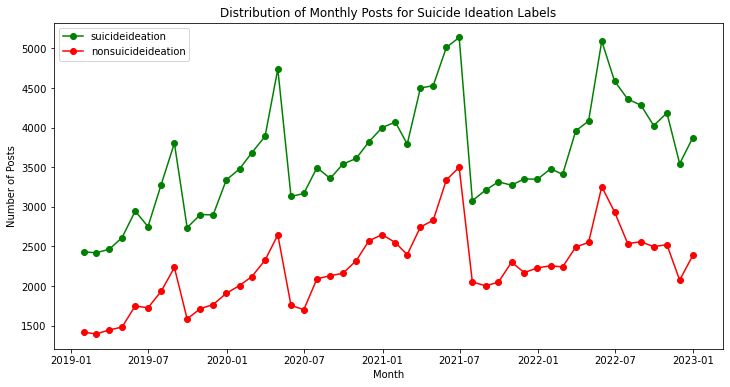

In [48]:
# Plot the post distribution over time
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(si_counts.index, si_counts, 'o-', color='green',label='suicideideation')
ax.plot(nonsi_counts.index, nonsi_counts, 'o-',color='red', label='nonsuicideideation')
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Number of Posts')
ax.set_title('Distribution of Monthly Posts for Suicide Ideation Labels')


plt.show()

In [5]:
# Filter author names where 'suicideIdeation' is equal to 1
authors_with_suicideideation = set(df.loc[df['suicideIdeation'] == 1, 'author'].tolist())

In [6]:
unique_authors_count = df['author'].nunique()

In [7]:
unique_authors_count

165004

In [8]:
# depression from 2019-2022
import pandas as pd

# Load the datasets
df_2019D = pd.read_csv('../TDAS_Subreddit_2019.csv')
print(df_2019D.shape)
df_2020D = pd.read_csv('../TDAS_Subreddit_2020.csv')
print(df_2020D.shape)
df_2021D = pd.read_csv('../TDAS_Subreddit_2021.csv')
print(df_2021D.shape)
df_2022D = pd.read_csv('../TDAS_Subreddit_2022.csv')
print(df_2022D.shape)


(1459783, 5)
(1244486, 5)
(1082262, 5)
(963969, 5)


In [11]:
# Filter rows where 'subreddit' is equal to 'depression'
df_2019D = df_2019D[df_2019D['subreddit'] == 'depression']
print(df_2019D.shape)
df_2020D = df_2020D[df_2020D['subreddit'] == 'depression']
print(df_2020D.shape)
df_2021D = df_2021D[df_2021D['subreddit'] == 'depression']
print(df_2021D.shape)
df_2022D = df_2022D[df_2022D['subreddit'] == 'depression']
print(df_2022D.shape)

(140780, 5)
(122760, 5)
(96070, 5)
(85283, 5)


In [12]:
# Combine the depression datasets from 2019-2022
dfD = pd.concat([df_2019D, df_2020D, df_2021D, df_2022D])

dfD.shape

(444893, 5)

In [15]:
# Filter author names where 'suicideIdeation' is equal to 1
authors_with_depression =  dfD['author'].nunique()


In [16]:
authors_with_depression 

248779

In [49]:
# Get unique users in each subreddit
suicidewatch_users = set(df['author'])
depression_users = set(dfD['author'])

# Find overlapping users
overlapping_users = suicidewatch_users.intersection(depression_users)


In [51]:
len(overlapping_users)

25022

In [54]:
# Calculate the ratio of unique users in each subreddit
suicidewatch_user_ratio = len(overlapping_users)/len(suicidewatch_users)
depression_user_ratio =  len(overlapping_users)/len(depression_users)
print(suicidewatch_user_ratio)
print(depression_user_ratio)

0.15257968327916435
0.10057922895421237


In [56]:
# Filter posts of overlapping users in r/suicidewatch
filtered_suicidewatch = df[df['author'].isin(overlapping_users)]

# Filter posts of overlapping users in r/depression
filtered_depression = dfD[dfD['author'].isin(overlapping_users)]

In [64]:
filtered_depression.shape

(84101, 5)

In [65]:
filtered_depression.to_csv('./0overlappingUserAnalysis/overlappingusers_Dep1922.csv', index=False)

In [63]:
filtered_suicidewatch.shape

(70742, 7)

In [66]:
filtered_suicidewatch.to_csv('./0overlappingUserAnalysis/overlappingusers_Sui1922.csv', index=False)

In [57]:
# Get the number of posts for each subreddit
suicidewatch_post_count = len(filtered_suicidewatch)
depression_post_count = len(filtered_depression)

In [59]:
depression_post_count

84101

In [58]:
suicidewatch_post_count

70742

In [61]:
suicidewatch_post_ratio

0.2515029668262958

In [62]:
depression_post_ratio

0.18903646494775148

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Extract demographic statistics from the r/suicide
print("Number of unique authors:", len(filtered_suicidewatch['author'].unique()))
print("Number of posts:", len(filtered_suicidewatch))
print("Earliest post date:", filtered_suicidewatch['created_utc'].min())
print("Latest post date:", filtered_suicidewatch['created_utc'].max())

# Extract characteristics statistics
print("Average post length:", np.mean(filtered_suicidewatch['selftext'].str.len()))


Number of unique authors: 25022
Number of posts: 70742
Earliest post date: 2019-01-01 00:52:56
Latest post date: 2022-12-31 23:21:18
Average post length: 373.28717028073845


In [70]:

# Extract demographic statistics from the r/depression
print("Number of unique authors:", len(filtered_depression['author'].unique()))
print("Number of posts:", len(filtered_depression))
print("Earliest post date:", filtered_depression['created_utc'].min())
print("Latest post date:", filtered_depression['created_utc'].max())

# Extract characteristics statistics
print("Average post length:", np.mean(filtered_depression['selftext'].str.len()))

Number of unique authors: 25022
Number of posts: 84101
Earliest post date: 2019-01-01 00:13:40
Latest post date: 2022-12-31 23:53:55
Average post length: 767.8030955259976


In [20]:
SI_Dep2020.to_csv('SI_Dep2020.csv')

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Read dataset into a pandas dataframe
df = pd.read_csv('SI_Dep2020.csv', index_col=0)


In [22]:
# Extract demographic statistics
print("Number of unique authors:", len(df['author'].unique()))
print("Number of posts:", len(df))
print("Earliest post date:", df['created_utc'].min())
print("Latest post date:", df['created_utc'].max())

# Extract characteristics statistics
print("Average post length:", np.mean(df['selftext'].str.len()))
print("Most common post title:", df['title'].mode()[0])


Number of unique authors: 1220
Number of posts: 4266
Earliest post date: 2020-01-01 02:58:52
Latest post date: 2020-12-31 23:18:47
Average post length: 787.0669064748201
Most common post title: Alone


In [24]:
pd.to_datetime(df['created_utc'])

20        2020-03-01 00:08:34
67        2020-03-01 00:29:26
81        2020-03-01 00:33:50
649       2020-03-01 04:23:02
715       2020-03-01 04:43:04
                  ...        
1243404   2020-09-30 17:03:36
1243768   2020-09-30 19:16:06
1243823   2020-09-30 19:37:12
1244229   2020-09-30 22:11:19
1244373   2020-09-30 23:14:56
Name: created_utc, Length: 4266, dtype: datetime64[ns]

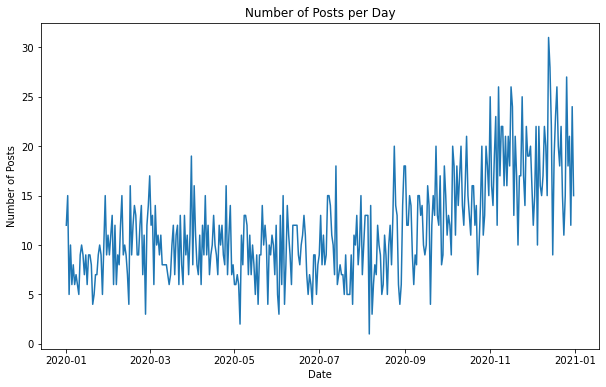

In [26]:
# Convert the created_utc column to a datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'])

# Group the posts by day and count the number of posts per day
daily_counts = df.groupby(pd.Grouper(key='created_utc', freq='D')).size()

# Create a line plot of the daily post counts
plt.figure(figsize=(10, 6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title("Number of Posts per Day")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.show()


In [27]:
df.shape

(4170, 6)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import LatentDirichletAllocation

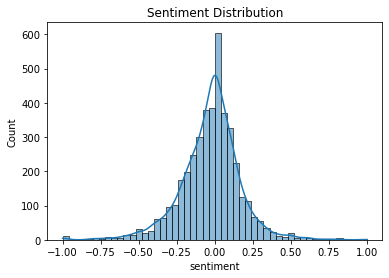

In [18]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


# Perform sentiment analysis on the selftext column
df['sentiment'] = df['selftext'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the distribution of sentiment scores
sns.histplot(data=df, x='sentiment', bins=50, kde=True)
plt.title('Sentiment Distribution')
plt.show()


In [26]:
# Load the dataset
df.selftext.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4261    False
4262    False
4263    False
4264    False
4265    False
Name: selftext, Length: 4170, dtype: bool

In [35]:
df = df.dropna()

In [37]:
from bertopic import BERTopic

In [48]:
# Install older version of joblib
!pip install --upgrade joblib==1.1.0

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


In [49]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP

[nltk_data] Downloading package stopwords to /home/jzhu10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jzhu10/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jzhu10/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('SI_Dep2020.csv')

# Drop rows with missing values in the selftext column
df = df.dropna(subset=['selftext'])

# Define a function to clean the selftext column
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Clean the selftext column
df['selftext'] = df['selftext'].apply(clean_text)

# Remove documents with less than 10 words or more than 500 words
df['word_count'] = df['selftext'].str.split().apply(len)
df = df[(df['word_count'] >= 10) & (df['word_count'] <= 500)]

# Drop the word_count column
df = df.drop('word_count', axis=1)

# Save the cleaned dataset
df.to_csv('SI_Dep2020_clean.csv', index=False)


In [52]:
df.shape

(3911, 6)

Topic 0: 0.028*"really" + 0.017*"amp" + 0.009*"your" + 0.008*"the" + 0.008*"you" + 0.007*"to" + 0.006*"we" + 0.006*"of" + 0.005*"a" + 0.004*"and"
Topic 1: 0.027*"the" + 0.017*"my" + 0.015*"of" + 0.013*"to" + 0.011*"and" + 0.010*"me" + 0.009*"i" + 0.006*"will" + 0.006*"is" + 0.006*"all"
Topic 2: 0.083*"i" + 0.040*"and" + 0.034*"my" + 0.028*"to" + 0.019*"im" + 0.019*"me" + 0.014*"the" + 0.014*"a" + 0.012*"just" + 0.012*"so"
Topic 3: 0.041*"the" + 0.030*"you" + 0.022*"to" + 0.022*"i" + 0.022*"of" + 0.021*"that" + 0.021*"and" + 0.017*"a" + 0.017*"is" + 0.015*"in"
Topic 4: 0.054*"i" + 0.031*"to" + 0.031*"and" + 0.022*"a" + 0.020*"my" + 0.019*"the" + 0.017*"it" + 0.015*"of" + 0.013*"me" + 0.012*"that"
Topic 5: 0.057*"she" + 0.050*"me" + 0.021*"her" + 0.016*"i" + 0.014*"shes" + 0.010*"and" + 0.006*"to" + 0.006*"just" + 0.005*"please" + 0.005*"hug"
Topic 6: 0.002*"fuckup" + 0.002*"pour" + 0.001*"explanation" + 0.001*"silently" + 0.001*"buzzed" + 0.001*"shroud" + 0.001*"friendsfamily" + 0.001*"

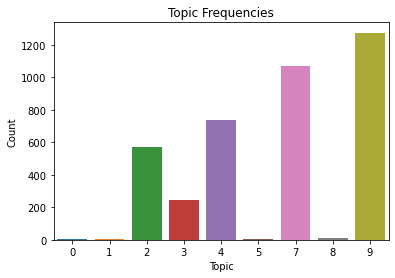

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim import corpora
from datetime import datetime



# Remove null values from the selftext column
df = df.dropna(subset=['selftext'])

# Convert created_utc to datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'])

# Define a function to preprocess the text
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Preprocess the text
docs = df['selftext'].dropna().apply(preprocess)

# Tokenize the documents
texts = [[word for word in doc.split()] for doc in docs]

# Create a dictionary and document-term matrix
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

# Print the top 10 topics
for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=True):
    print(f"Topic {i}: {topic}")

# Visualize the topic frequencies
topics = [lda_model.get_document_topics(doc) for doc in corpus]
topic_freq = pd.Series([max(topic, key=lambda x:x[1])[0] for topic in topics])
sns.countplot(x=topic_freq)
plt.title('Topic Frequencies')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()



Topic 0: 0.032*"fuck" + 0.029*"want" + 0.029*"feel" + 0.026*"like" + 0.021*"life" + 0.020*"dont" + 0.017*"hate" + 0.012*"wish" + 0.011*"love" + 0.011*"peopl"
Topic 1: 0.019*"feel" + 0.019*"like" + 0.018*"dont" + 0.015*"life" + 0.012*"want" + 0.012*"peopl" + 0.012*"iv" + 0.012*"work" + 0.011*"know" + 0.010*"depress"
Topic 2: 0.012*"know" + 0.012*"mom" + 0.011*"life" + 0.010*"year" + 0.010*"help" + 0.008*"dont" + 0.008*"live" + 0.008*"want" + 0.007*"famili" + 0.007*"doctor"
Topic 3: 0.015*"year" + 0.010*"birthdai" + 0.009*"didnt" + 0.008*"plai" + 0.007*"brother" + 0.007*"peopl" + 0.006*"game" + 0.006*"got" + 0.005*"friend" + 0.005*"go"
Topic 4: 0.034*"feel" + 0.027*"dont" + 0.023*"like" + 0.019*"want" + 0.018*"iv" + 0.017*"know" + 0.012*"depress" + 0.012*"time" + 0.011*"friend" + 0.010*"think"
Topic 5: 0.009*"lesbian" + 0.008*"tire" + 0.007*"supervisor" + 0.006*"art" + 0.006*"season" + 0.005*"vide" + 0.005*"que" + 0.005*"goddamn" + 0.004*"alcohol" + 0.004*"drunk"
Topic 6: 0.037*"amp" + 0

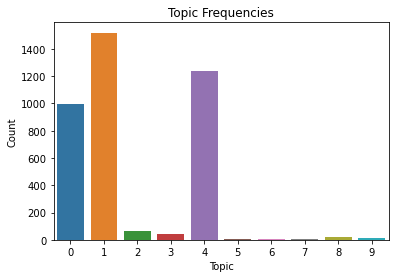

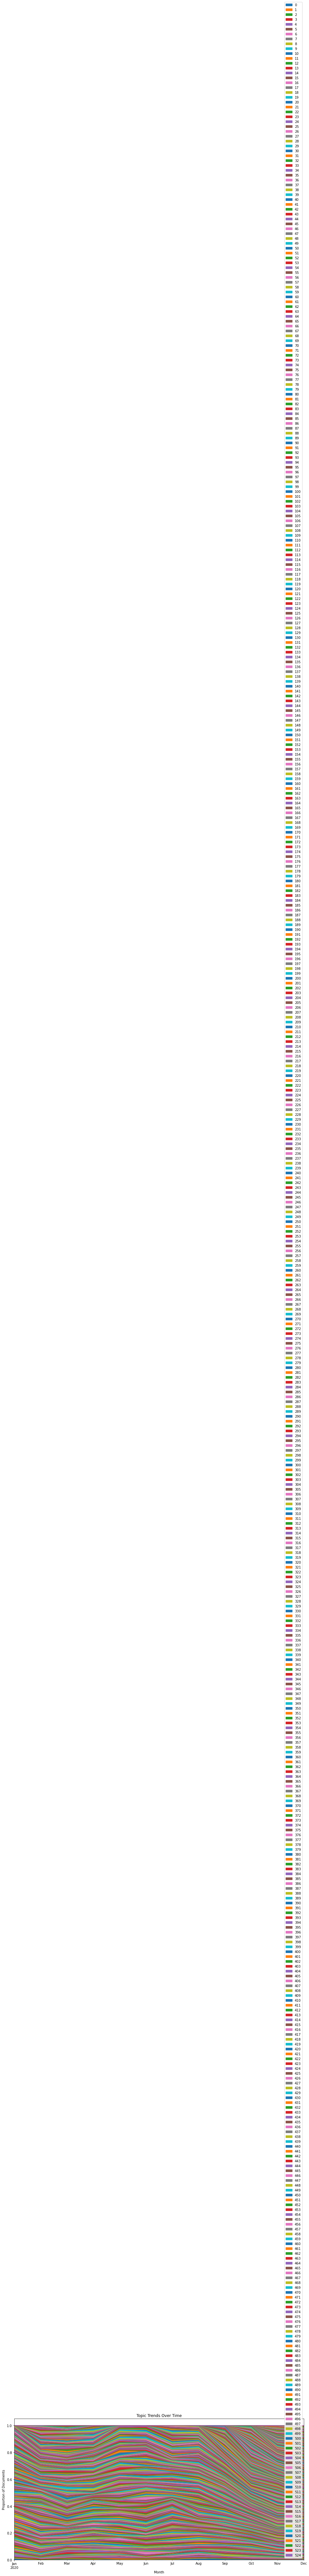

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim import corpora
from datetime import datetime


# Remove null values from the selftext column
df = df.dropna(subset=['selftext'])

# Convert created_utc to datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'])

# Define a function to clean the selftext column
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Clean the selftext column
df['selftext'] = df['selftext'].apply(clean_text)

# Define a function to preprocess the text
def preprocess(text):
    # Tokenize the text
    tokens = text.split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in gensim.parsing.preprocessing.STOPWORDS]
    # Remove words with less than 3 characters
    tokens = [token for token in tokens if len(token) > 2]
    # Lemmatize the tokens
    lemmatizer = gensim.parsing.PorterStemmer()
    tokens = [lemmatizer.stem(token) for token in tokens]
    return tokens

# Preprocess the text
docs = df['selftext'].dropna().apply(preprocess)

# Create a dictionary and document-term matrix
dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

# Print the top 10 topics
for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=True):
    print(f"Topic {i}: {topic}")

# Visualize the topic frequencies
topics = [lda_model.get_document_topics(doc) for doc in corpus]
topic_freq = pd.Series([max(topic, key=lambda x:x[1])[0] for topic in topics])
sns.countplot(x=topic_freq)
plt.title('Topic Frequencies')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

# Get the topic trends over time
df['topics'] = topics
topic_trends = df.groupby([pd.Grouper(key='created_utc', freq='M')])['topics'].apply(lambda x: pd.Series([max(topic, key=lambda x:x[1])[0] for topic in x])).unstack().fillna(0)

# Normalize the topic trends
topic_trends = topic_trends.div(topic_trends.sum(axis=1), axis=0)

# Plot the topic trends over time
topic_trends.plot(kind='area', figsize=(16,8))
plt.title('Topic Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Proportion of Documents')
plt.show()


In [61]:

# Print the top 10 topics
for i, topic in lda_model.show_topics(num_topics=10, num_words=10, formatted=True):
    print(f"Topic {i}: {topic}")

Topic 0: 0.032*"fuck" + 0.029*"want" + 0.029*"feel" + 0.026*"like" + 0.021*"life" + 0.020*"dont" + 0.017*"hate" + 0.012*"wish" + 0.011*"love" + 0.011*"peopl"
Topic 1: 0.019*"feel" + 0.019*"like" + 0.018*"dont" + 0.015*"life" + 0.012*"want" + 0.012*"peopl" + 0.012*"iv" + 0.012*"work" + 0.011*"know" + 0.010*"depress"
Topic 2: 0.012*"know" + 0.012*"mom" + 0.011*"life" + 0.010*"year" + 0.010*"help" + 0.008*"dont" + 0.008*"live" + 0.008*"want" + 0.007*"famili" + 0.007*"doctor"
Topic 3: 0.015*"year" + 0.010*"birthdai" + 0.009*"didnt" + 0.008*"plai" + 0.007*"brother" + 0.007*"peopl" + 0.006*"game" + 0.006*"got" + 0.005*"friend" + 0.005*"go"
Topic 4: 0.034*"feel" + 0.027*"dont" + 0.023*"like" + 0.019*"want" + 0.018*"iv" + 0.017*"know" + 0.012*"depress" + 0.012*"time" + 0.011*"friend" + 0.010*"think"
Topic 5: 0.009*"lesbian" + 0.008*"tire" + 0.007*"supervisor" + 0.006*"art" + 0.006*"season" + 0.005*"vide" + 0.005*"que" + 0.005*"goddamn" + 0.004*"alcohol" + 0.004*"drunk"
Topic 6: 0.037*"amp" + 0

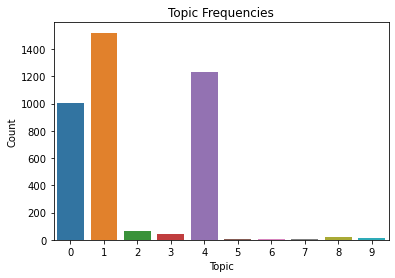

In [62]:
# Visualize the topic frequencies
topics = [lda_model.get_document_topics(doc) for doc in corpus]
topic_freq = pd.Series([max(topic, key=lambda x:x[1])[0] for topic in topics])
sns.countplot(x=topic_freq)
plt.title('Topic Frequencies')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

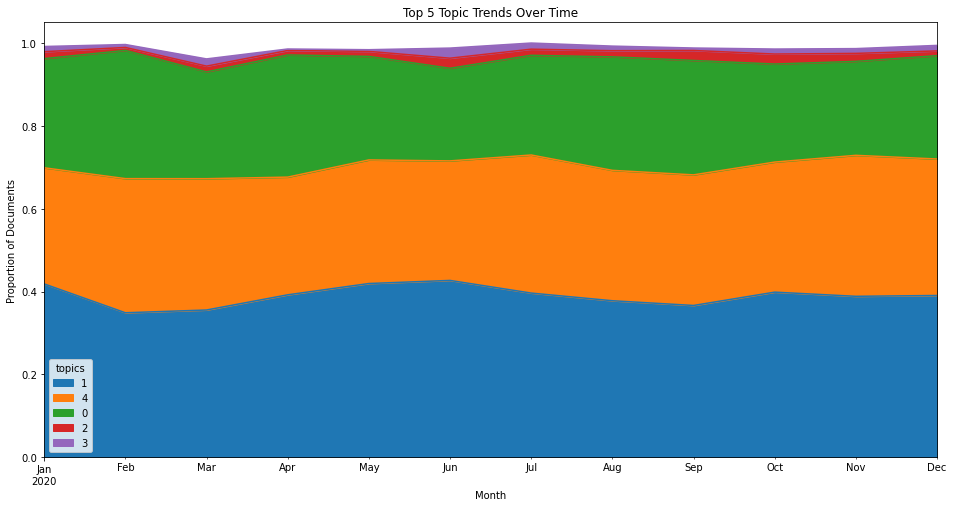

In [63]:
# Get the most frequent topics
topic_freq = pd.Series([max(topic, key=lambda x:x[1])[0] for topic in lda_model[corpus]])
top_topics = topic_freq.value_counts().head(5).index.tolist()

# Get the topic trends over time for the top topics
df['topics'] = [max(lda_model[doc], key=lambda x:x[1])[0] for doc in corpus]
topic_trends = df.groupby([pd.Grouper(key='created_utc', freq='M')])['topics'].value_counts(normalize=True).unstack().fillna(0)
top_topic_trends = topic_trends[top_topics]

# Plot the top 5 topic trends over time
top_topic_trends.plot(kind='area', stacked=True, figsize=(16,8))
plt.title('Top 5 Topic Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Proportion of Documents')
plt.show()

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('SI_Dep2020.csv')

In [3]:
df.head(3)

Unnamed: 0       author          created_utc  \
0          20    creeklisa  2020-03-01 00:08:34   
1          67   PileOfRats  2020-03-01 00:29:26   
2          81  SausageSlam  2020-03-01 00:33:50   

                                            selftext  \
0  i want help, i can't say to the people that ca...   
1  took indica edibles last wednesday and felt am...   
2  idk why i don't just do it, it would be pretty...   

                                 title   subreddit  
0            getting deeper and deeper  depression  
1                        It won't end.  depression  
2  I daydream about suicide every day.  depression

In [4]:
df['created_utc'] = pd.to_datetime(df['created_utc'], errors='coerce')

In [5]:
# Extract the hour and day of week from the 'created_utc' column
df['hour'] = df['created_utc'].dt.hour
df['day_of_week'] = df['created_utc'].dt.dayofweek

In [7]:
# Create a pivot table with the count of posts by day_of_week and hour
pivot_table = df.groupby(['day_of_week', 'hour']).size().reset_index(name='posts_count')
pivot_table = pivot_table.pivot('day_of_week', 'hour', 'posts_count')

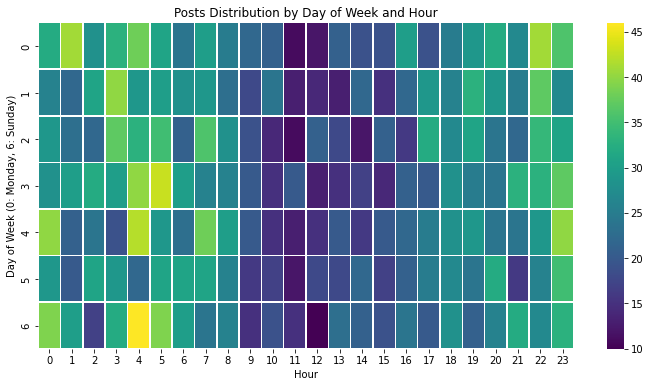

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis', linewidths=0.5)
plt.title('Posts Distribution by Day of Week and Hour')
plt.ylabel('Day of Week (0: Monday, 6: Sunday)')
plt.xlabel('Hour')
plt.show()

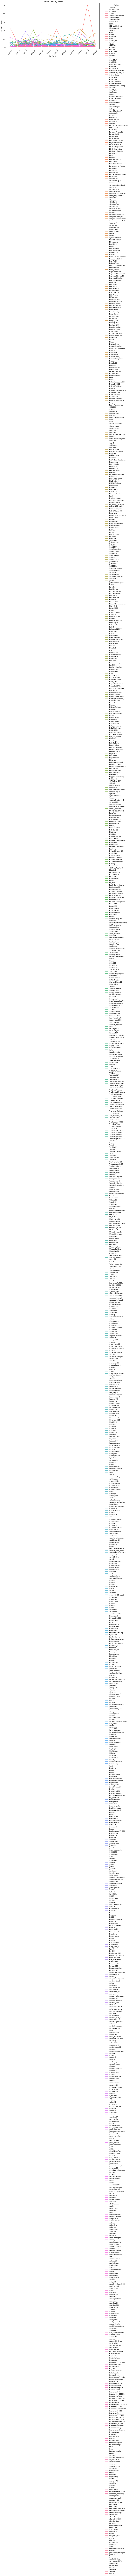

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with columns: 'author', 'created_utc', 'selftext', and 'subreddit'

# Convert the 'created_utc' column to a datetime object
df['created_utc'] = pd.to_datetime(df['created_utc'])

# Extract the year and month from the 'created_utc' column
df['year_month'] = df['created_utc'].apply(lambda x: x.strftime('%Y-%m'))

# Calculate the number of posts per month for each author
author_monthly_post_counts = df.groupby(['author', 'year_month']).size().reset_index(name='posts_count')

# Plot the authors' posts by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=author_monthly_post_counts, x='year_month', y='posts_count', hue='author', marker='o')
plt.xticks(rotation=45)
plt.title("Authors' Posts by Month")
plt.ylabel('Number of Posts')
plt.xlabel('Year-Month')
plt.legend(title='Author', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

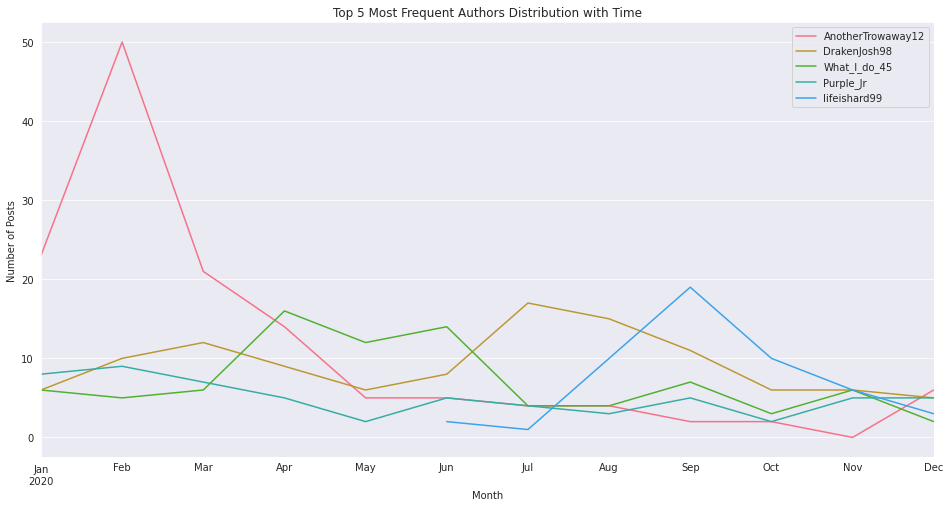

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#df = pd.read_csv('SI_Dep2020.csv')

# Convert created_utc to datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Define the time range to analyze
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-12-31')

# Filter the dataset by time range
df = df[(df['created_utc'] >= start_date) & (df['created_utc'] <= end_date)]

# Get the top 5 most frequent authors
top_authors = df['author'].value_counts().head(5).index.tolist()

# Plot the distribution of the top 5 authors over time
sns.set_style("darkgrid")
sns.set_palette("husl")
plt.figure(figsize=(16, 8))
for author in top_authors:
    author_df = df[df['author'] == author]
    author_counts = author_df.groupby(pd.Grouper(key='created_utc', freq='M')).size()
    author_counts.plot(label=author)
plt.title('Top 5 Most Frequent Authors Distribution with Time')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.legend()
plt.show()




In [14]:
import pandas as pd

# Load the dataset
#df = pd.read_csv('SI_Dep2020.csv')

# Convert created_utc to datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Define the filter date
filter_date = pd.to_datetime('2020-03-27')

# Filter the dataset by date
df = df[df['created_utc'] >= filter_date]

# Create a new dataframe with first post time and number of posts for each author
df2 = pd.DataFrame(columns=['author', 'first_post_time', 'num_posts'])
for author in df['author'].unique():
    author_df = df[df['author'] == author]
    first_post_time = author_df['created_utc'].min()
    num_posts = len(author_df)
    df2 = df2.append({'author': author, 'first_post_time': first_post_time, 'num_posts': num_posts}, ignore_index=True)

# Print the new dataframe
print(df2.head())


                author     first_post_time num_posts
0      Paradoxicalnech 2020-03-27 00:55:35         3
1  reddit_throwaway_ac 2020-03-27 03:52:55         2
2         VeiledEnigma 2020-03-27 04:10:02         3
3      rewindvampire66 2020-03-27 05:32:43         1
4            Purple_Jr 2020-03-27 08:21:10        38


In [15]:
df2.shape

(1058, 3)

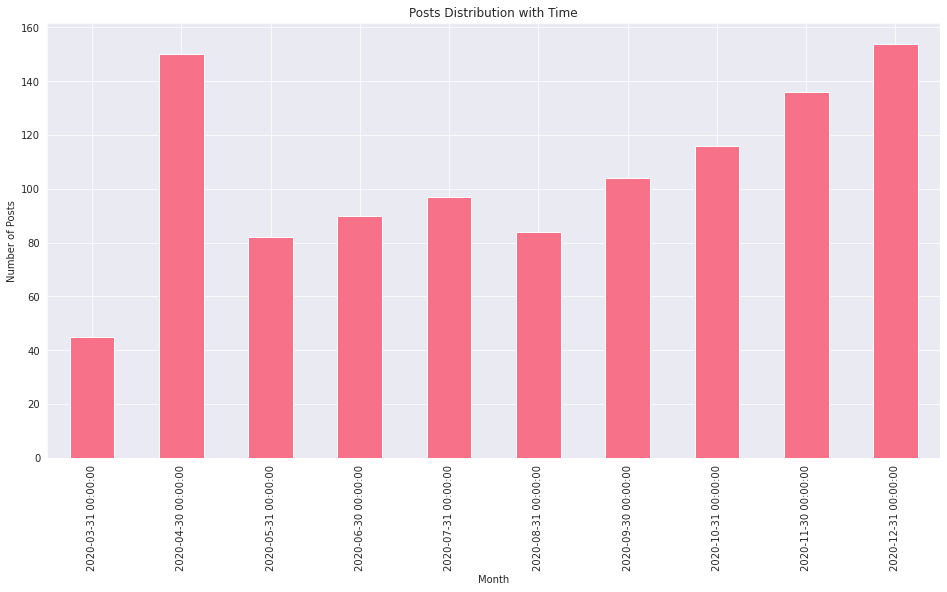

In [17]:
# Compute the number of posts per month
monthly_counts = df2.groupby(pd.Grouper(key='first_post_time', freq='M')).size()

# Plot the number of posts per month
sns.set_style("darkgrid")
sns.set_palette("husl")
plt.figure(figsize=(16, 8))
monthly_counts.plot(kind='bar')
plt.title('Posts Distribution with Time')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.show()